<a href="https://colab.research.google.com/github/Cherryberry112/CSE475_Machine_Learning-/blob/main/Lab/Lab02_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Styling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set a customized pastel theme
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams.update({
    "figure.figsize": (7,5),
    "axes.titlesize": 14,
    "axes.labelsize": 11
})

# Load Dataset

In [3]:
# Download dataset
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf

# Read CSV
df = pd.read_csv("Mall_Customers.csv")

df.head(10)


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 17.0MB/s]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Basic Exploration

In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Rename columns for convenience
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Feature Selection & Scaling

In [5]:
features = ['annual_income_(k$)', 'spending_score_(1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Visualization (2D)

Explained Variance → PC1: 50.50%, PC2: 49.50%


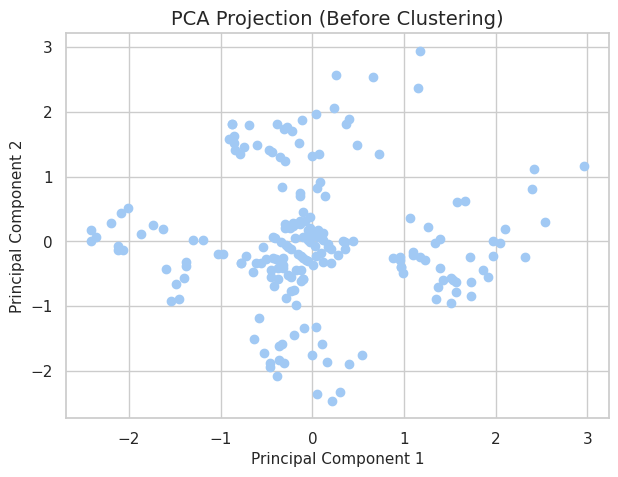

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
print(f"Explained Variance → PC1: {explained_var[0]:.2f}%, PC2: {explained_var[1]:.2f}%")

# PCA scatter BEFORE clustering (visual output)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Projection (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# K-Means Clustering

##Finding Optimal K: Elbow + Silhouette

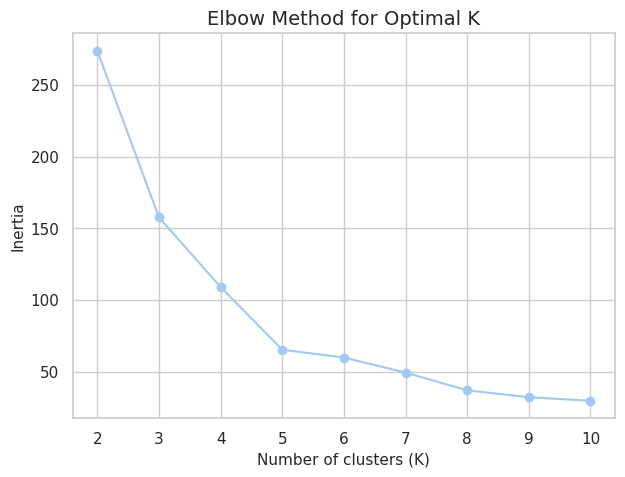

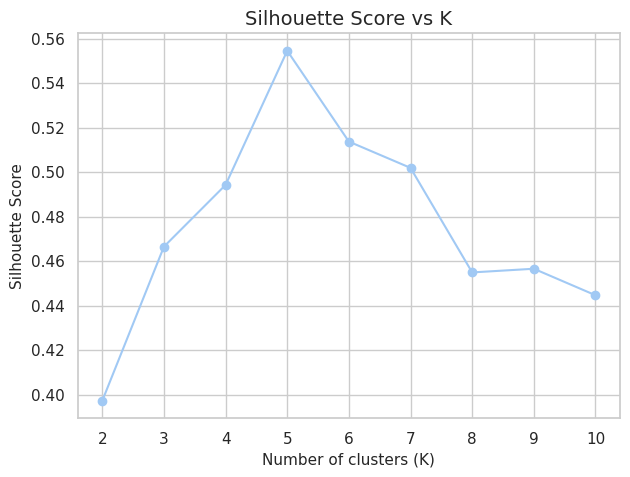

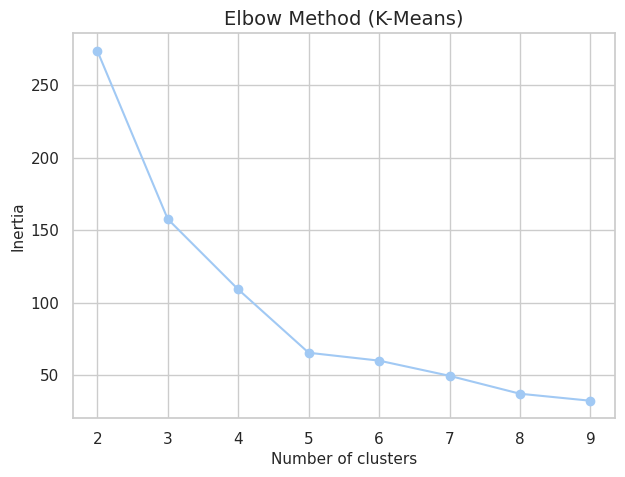

In [8]:
# Elbow Method
# ----------------------------
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Scores
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,10), inertia, marker='o')
plt.title("Elbow Method (K-Means)")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

##Apply K-Means with Optimal K

Optimal K = 5
K-Means Silhouette Score: 0.5546571631111091
K-Means Silhouette Score: 0.5546571631111091


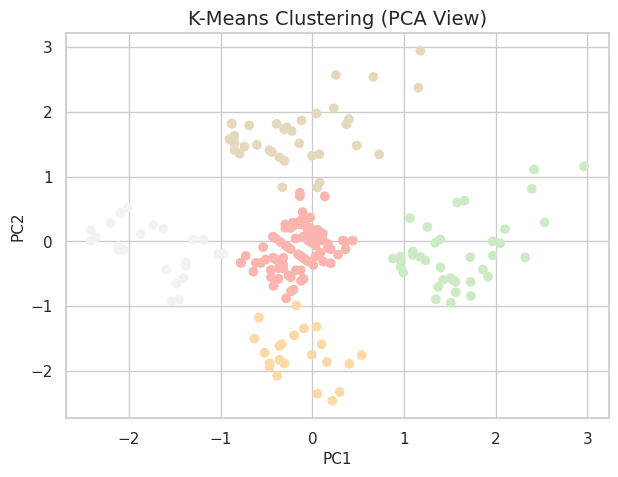

In [9]:
# Based on Elbow + Silhouette analysis
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

print(f"Optimal K = {optimal_k}")
print("K-Means Silhouette Score:", silhouette_score(X_scaled, k_labels))

kmeans = KMeans(n_clusters=5, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

print("K-Means Silhouette Score:", silhouette_score(X_scaled, k_labels))

# Visualize
plt.scatter(pca_df.PC1, pca_df.PC2, c=k_labels, cmap='Pastel1')
plt.title("K-Means Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# DBSCAN Clustering

DBSCAN clusters: 1


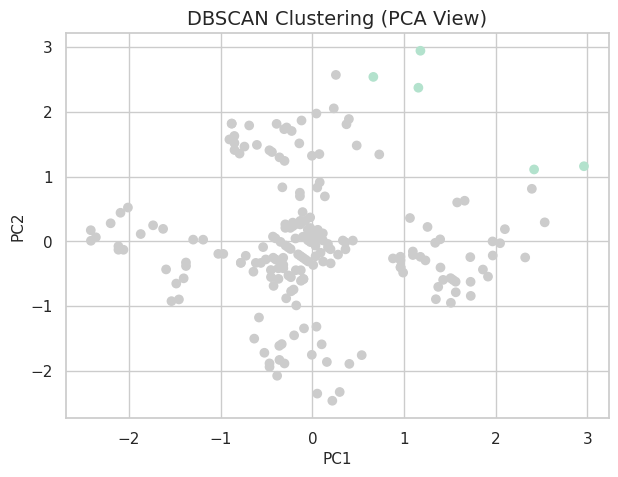

In [10]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
d_labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise)
print("DBSCAN clusters:", len(set(d_labels)) - (1 if -1 in d_labels else 0))

# Visualize
plt.scatter(pca_df.PC1, pca_df.PC2, c=d_labels, cmap='Pastel2')
plt.title("DBSCAN Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#Gaussian Mixture Model (GMM)

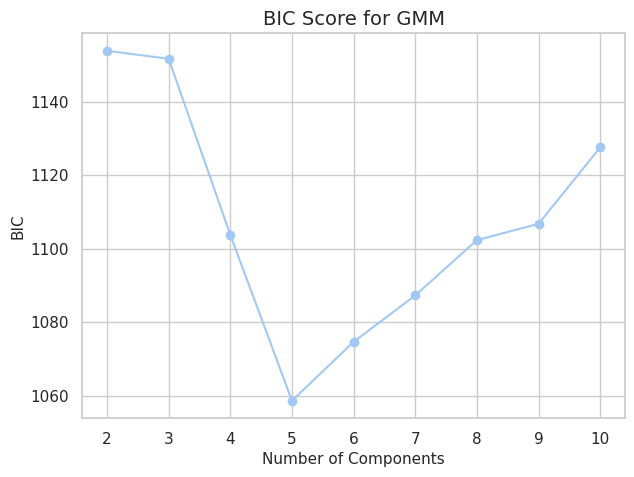

Optimal GMM Components: 5
GMM Silhouette Score: 0.5536892843811245


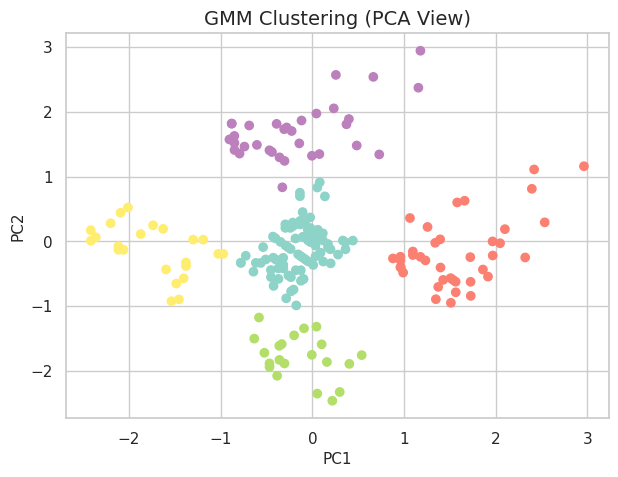

In [12]:
# Find optimal number of components using BIC
bic_scores = []
components_range = range(2, 11)

for n in components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

plt.plot(components_range, bic_scores, marker='o')
plt.title("BIC Score for GMM")
plt.xlabel("Number of Components")
plt.ylabel("BIC")
plt.show()

optimal_components = components_range[np.argmin(bic_scores)]

print("Optimal GMM Components:", optimal_components)

gmm = GaussianMixture(n_components=optimal_components, random_state=42)
g_labels = gmm.fit_predict(X_scaled)

print("GMM Silhouette Score:", silhouette_score(X_scaled, g_labels))

# Visualize
plt.scatter(pca_df.PC1, pca_df.PC2, c=g_labels, cmap='Set3')
plt.title("GMM Clustering (PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()